In [9]:
# Config
seed = 42  # for reproducibility
training_split_ratio = 0.9  # use 90% of samples for training, 10% for testing
num_epochs = 5

# If the following values are False, the models will be downloaded and not computed
compute_histograms = False
train_whole_images = False
train_patches = False

In [4]:
#TODO    test .nrrd
# -*- coding : UTF-8 -*-
# @file   : rd_wt_nrrd.py
# @Time   : 2021-09-14 17:01
# @Author : wmz

import numpy as np
import nrrd


if __name__ == "__main__":
    # Some sample numpy data
    filename = r'E:\course\31\machineLearning\AIforMedicine\dataset\胸腰椎图像\ZIEHM\20150924\429\C1\1.nrrd'

    #
    # # Write to a NRRD file
    # nrrd.write(filename, data)

    # Read the data back from file
    readdata, header = nrrd.read(filename)
    #readdata1, header1 = nrrd.read(filename1)


    #print (readdata == readdata1)
    print(readdata.shape)
    print(header)

(320, 320, 319)
OrderedDict([('type', 'double'), ('dimension', 3), ('space', 'left-posterior-superior'), ('sizes', array([320, 320, 319])), ('space directions', array([[-0.5       ,  0.        ,  0.        ],
       [ 0.        ,  0.5       ,  0.        ],
       [ 0.        ,  0.        , -0.50157233]])), ('kinds', ['domain', 'domain', 'domain']), ('endian', 'little'), ('encoding', 'gzip'), ('space origin', array([  0. ,   0. , 159.5]))])


In [11]:
import enum
import time
import random
import multiprocessing
from pathlib import Path

import torch
import torchvision
import torchio as tio
import torch.nn.functional as F

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

from IPython import display
from tqdm.auto import tqdm

random.seed(seed)
torch.manual_seed(seed)
%config InlineBackend.figure_format = 'retina'
num_workers = multiprocessing.cpu_count()
plt.rcParams['figure.figsize'] = 12, 6

print('Last run on', time.ctime())
print('TorchIO version:', tio.__version__)

Last run on Tue Dec  6 14:44:52 2022
TorchIO version: 0.18.86


In [43]:
print(2)

2


In [17]:
!pip install MedPy

Looking in indexes: https://pypi.doubanio.com/simple/

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import torch
import torchio as tio
from torch.utils.data import DataLoader

E:\course\31\machineLearning\AIforMedicine\dataset\胸腰椎图像\ZIEHM\20170117\0\9


  0%|          | 0/75 [00:00<?, ?it/s]


FileNotFoundError: File not found: "E"

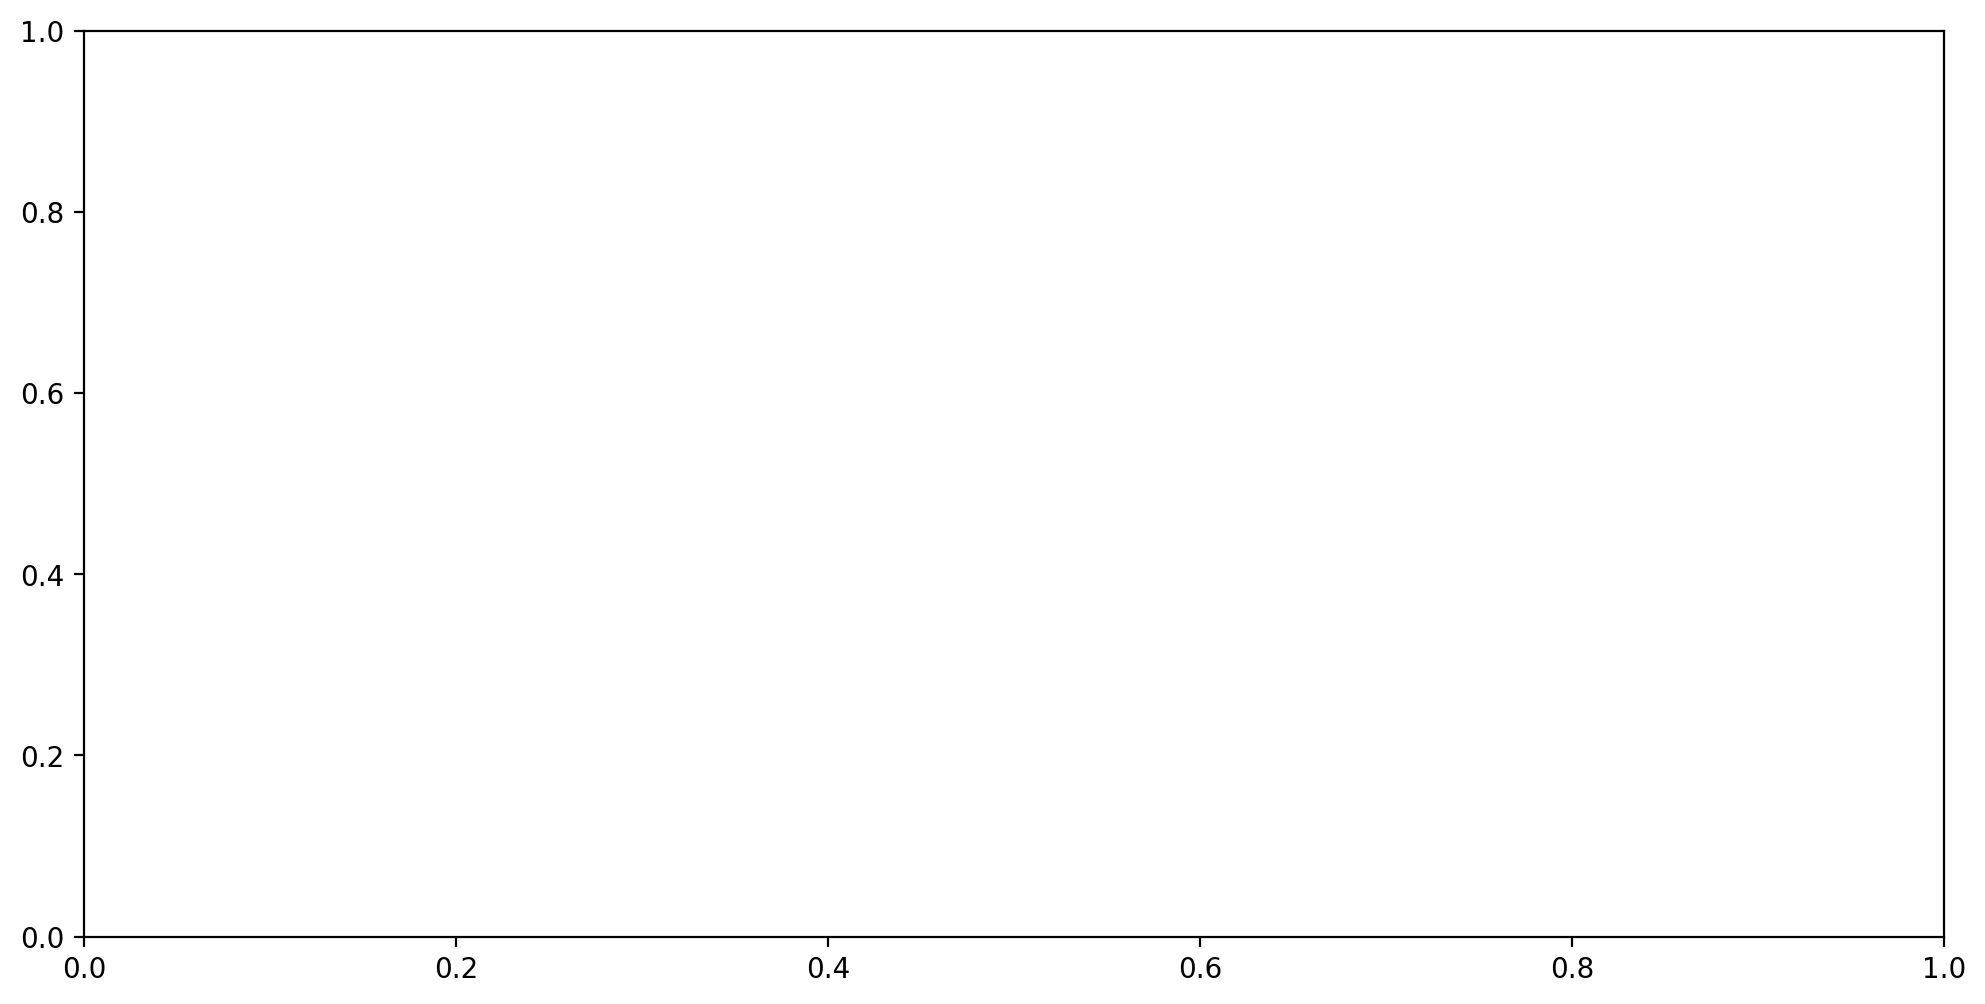

In [45]:
from tqdm import tqdm

pth = r'E:\course\31\machineLearning\AIforMedicine\dataset\胸腰椎图像\ZIEHM\20170117\0\9'

paths = pth

def plot_histogram(axis, tensor, num_positions=100, label=None, alpha=0.05, color=None):
    values = tensor.numpy().ravel()
    kernel = stats.gaussian_kde(values)
    positions = np.linspace(values.min(), values.max(), num=num_positions)
    histogram = kernel(positions)
    kwargs = dict(linewidth=1, color='black' if color is None else color, alpha=alpha)
    if label is not None:
        kwargs['label'] = label
    axis.plot(positions, histogram, **kwargs)


fig, ax = plt.subplots(dpi=100)
print(paths)
for path in tqdm(paths):
    tensor = tio.ScalarImage(path).data
    if 'HH' in path.name: color = 'red'
    elif 'Guys' in path.name: color = 'green'
    elif 'IOP' in path.name: color = 'blue'
    plot_histogram(ax, tensor, color= 'red')
    print(tensor)

ax.set_xlim(-100, 2000)
ax.set_ylim(0, 0.004);
ax.set_title('Original histograms of all samples')
ax.set_xlabel('Intensity')
ax.grid()
plt.show(ax)


(320, 320, 1) (320, 320, 1) [[[ True]
  [ True]
  [ True]
  ...
  [ True]
  [ True]
  [ True]]

 [[ True]
  [ True]
  [ True]
  ...
  [ True]
  [ True]
  [ True]]

 [[ True]
  [ True]
  [ True]
  ...
  [ True]
  [ True]
  [ True]]

 ...

 [[ True]
  [ True]
  [ True]
  ...
  [ True]
  [ True]
  [ True]]

 [[ True]
  [ True]
  [ True]
  ...
  [ True]
  [ True]
  [ True]]

 [[ True]
  [ True]
  [ True]
  ...
  [ True]
  [ True]
  [ True]]]


IndexError: index 10 is out of bounds for axis 2 with size 1

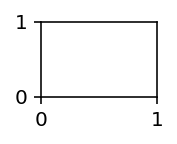

In [55]:
from medpy.io import load

pth = r'E:\course\31\machineLearning\AIforMedicine\dataset\胸腰椎图像\ZIEHM\20170117\2365\C2365\2491'
pth1 = r'E:\course\31\machineLearning\AIforMedicine\dataset\胸腰椎图像\ZIEHM\20170117\2365\C2365\2490'

img, h = load(pth)
img2,h2 = load(pth1)
print(img.shape,img2.shape,img==img2)
for i in range(1,25):
    plt.subplot(5, 5, i + 1)
    in1 = i*10
    plt.imshow(img[:,:,in1])
    plt.axis('off')

print (i.shape, i.dtype)
plt.imshow(i)#TODO:为什么load和在slicer中看到的不一样

TypeError: Invalid shape (1024, 1024, 390) for image data

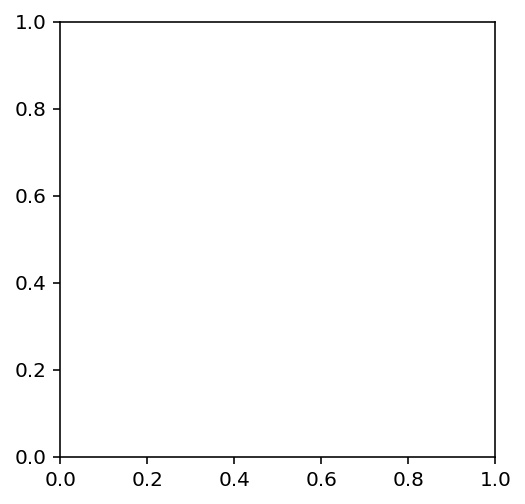

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
h.get_voxel_spacing()
